# numpy demo

``numpy`` is a python library for handling high-dimensional arrays.
An example of a three-dimensional array, is a RGB bitmap image, which is an `m\times n` matrix of triples `(r, g, b)`. Here `m` is the number of rows of pixels, `n` the number of columns of pixels.
Overall, this data can be viewed as a three-dimensional array of shape `m\times n\times 3`.

Numpy documentation is available at http://www.numpy.org.

In the example below, we read using ``PIL`` (python image library)

In [10]:
import numpy as np # now all numpy commands can be accesses prefixed with "np."
from PIL import Image # PIL is the python image library
mb = Image.open('mandelbrot_set.bmp')

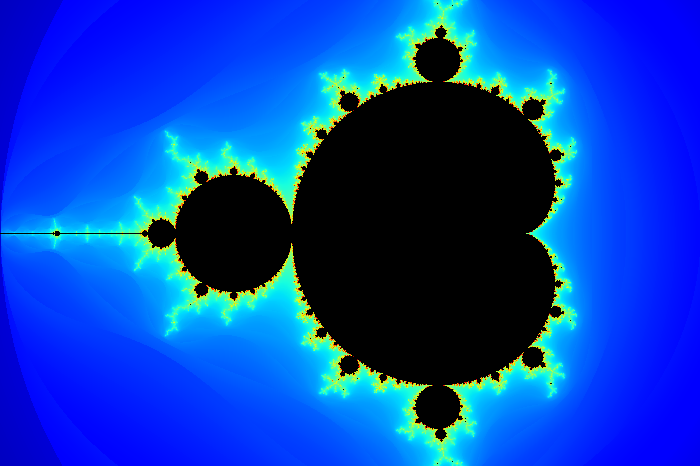

In [9]:
mb

We can now convert the image into a numpy array:

In [15]:
mbarray = np.array(mb)
print mbarray.shape, mbarray.dtype

(466, 700, 3) uint8


The numpy array ``mbarray`` stores the pixels of the image. The pixel values are 8-byte integers.
Any single pixel can be read now. For example, the blue intensity of the right-most pixel at the horizontal centre-line is:

In [17]:
mbarray[233,699,2]

255

If we want all three RGB values:

In [18]:
mbarray[233,699,:]

array([  0,   6, 255], dtype=uint8)

For more information on indexing and slicing see https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html

As an example of these methods, let us crop the array to view only the top half:

In [19]:
mbtophalf = mbarray[0:233,:,:]

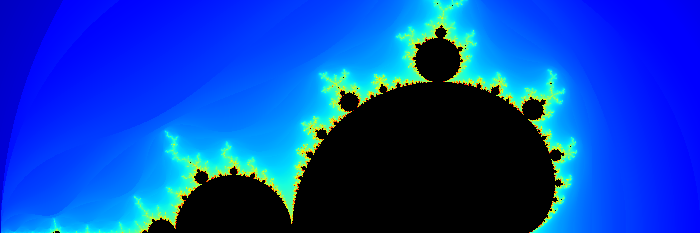

In [21]:
Image.fromarray(mbtophalf, 'RGB')

## Smoothing example

We will smooth the image by averaging over shifts (see documentation https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.roll.html for how to shift an array along a given axis.

In [32]:
def smooth(arr, n):
    """
    Smooth out ``arr`` by averaging over ``n`` pixels along axes ``0`` and ``1``.
    """
    
    return (sum([np.roll(np.roll(arr.astype(int), i, axis=0), j, axis=1) for i in range(-n, n+1) for j in range(-n, n+1)])/(2*n+1)^2).astype('uint8')

### A note on the above code block:

The data type of the original array was 'uint8', which is 8-bit unsigned integers. These are added modulo `255`, so if we would like to average them, we must first change the datatype to ``'int'``. Before returning, the data type is changed back to ``'uint8'``. These are achieved using the method ``.astype``.

In [33]:
mbsmooth = smooth(mbarray, 3)

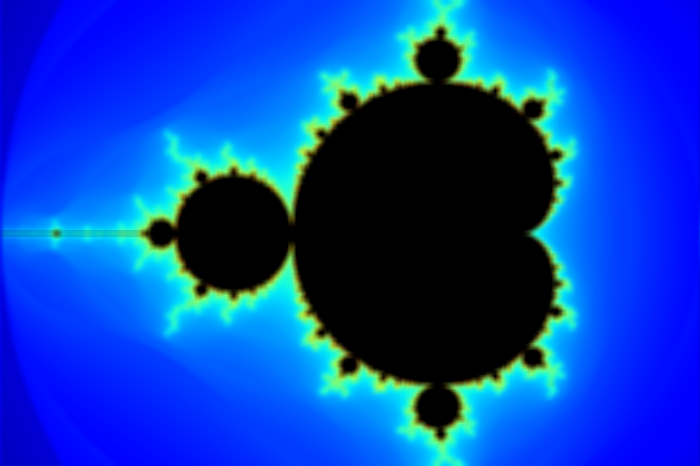

In [34]:
Image.fromarray(mbsmooth)

The difference between an image and its smoothing detects edges:

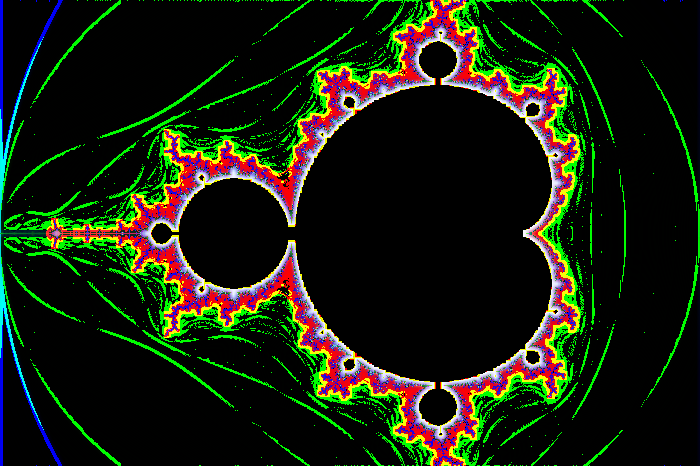

In [35]:
Image.fromarray(mbarray-mbsmooth)